In [151]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [186]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [187]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [188]:
def compute_loss_mse(y, tx, w):
    e = y - tx.dot(w)
    sum2 = e.T.dot(e)
    return sum2 / len(y)
compute_loss = compute_loss_mse

compute_loss(y, tx, (1, 2))

5388.9667317741696

# 2 Grid Search

Fill in the function `grid_search()` below:

In [189]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i, j] = compute_loss(y, tx, (w0[i], w1[j]))
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=37.58708203904644, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.110 seconds


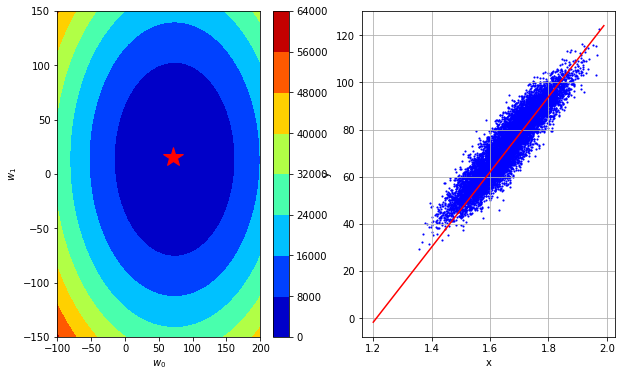

In [190]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [191]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx.dot(w)
    return tx.T.dot(e) / -len(y)
    
compute_gradient(y, tx, (1, 2))

array([-72.293922  , -11.47971243])

Please fill in the functions `gradient_descent` below:

In [192]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y, tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

#gradient_descent(y, tx, (1, 2), 50, 0.7)

Test your gradient descent function through gradient descent demo shown below:

In [193]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([100, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent: execution time=0.005 seconds


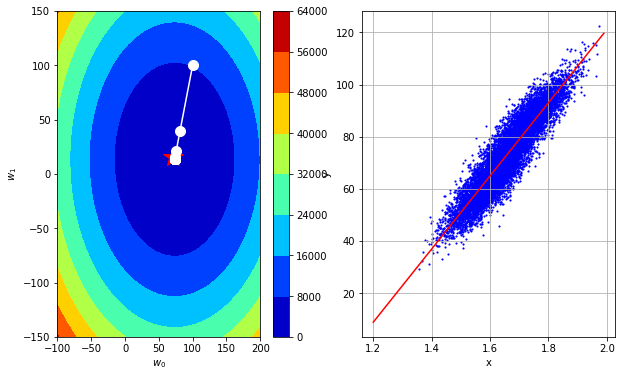

<function __main__.plot_figure>

In [194]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=len(gradient_ws))

# 4 Stochastic gradient descent

In [195]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for batch_y, batch_tx in batch_iter(y, tx, batch_size, max_iters):
        loss = compute_loss(batch_y, batch_tx, w)
        grad = compute_stoch_gradient(batch_y, batch_tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent: loss={l}, w0={w0}, w1={w1}".format(l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [196]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent: loss=8226.709480062716, w0=63.490846940568765, w1=43.348369251541094
Gradient Descent: loss=804.5627207157776, w0=43.63547655493428, w1=18.24942961158222
Gradient Descent: loss=583.7397857521554, w0=60.54797178829816, w1=44.70631017173113
Gradient Descent: loss=13.05074864468841, w0=63.07677918228793, w1=44.66809816388592
Gradient Descent: loss=35.53973323232783, w0=67.24984391744849, w1=44.46860121773164
Gradient Descent: loss=361.75310501197004, w0=53.93597815817837, w1=33.23622243643533
Gradient Descent: loss=169.19759473445936, w0=44.83065985402859, w1=18.112123964611072
Gradient Descent: loss=867.8123108864397, w0=65.45171783693421, w1=-5.157517996227174
Gradient Descent: loss=40.889712138518895, w0=69.92787231906217, w1=-2.4333761520725536
Gradient Descent: loss=376.7507243378351, w0=56.34082499723617, w1=17.651139679078373
Gradient Descent: loss=56.01945753291737, w0=61.580055302455584, w1=28.140460460465405
Gradient Descent: loss=48.80917854399596, w0=66.47050

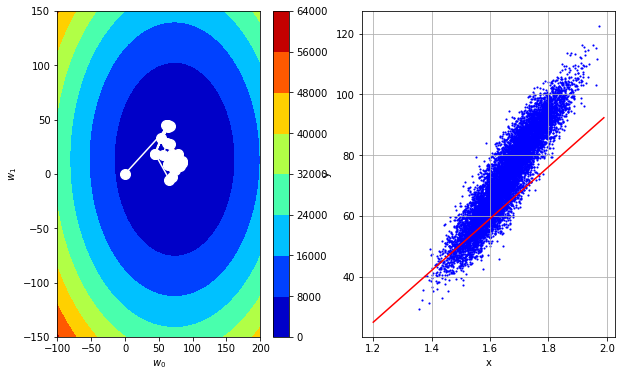

<function __main__.plot_figure>

In [197]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=len(gradient_ws))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

In [211]:
def plot_figure(n_iter):
    grid_w0, grid_w1 = generate_w(num_intervals=50)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)


### Exercise 5

Load and plot data containing outliers

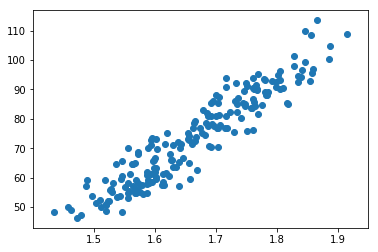

In [212]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)
    

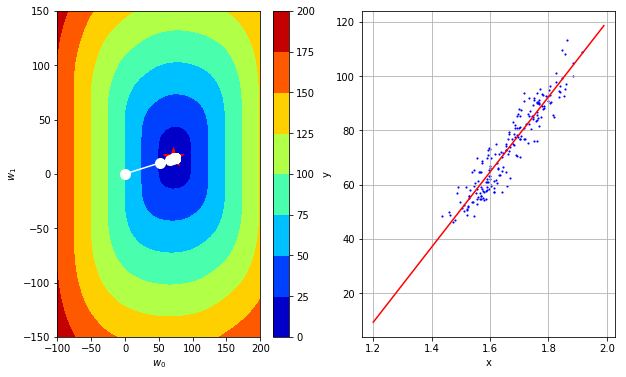

In [213]:
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
plot_figure(len(gradient_ws))

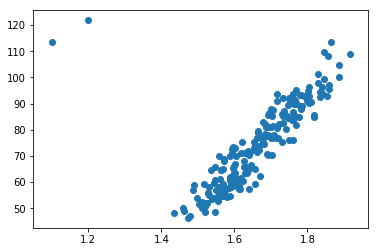

In [214]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)

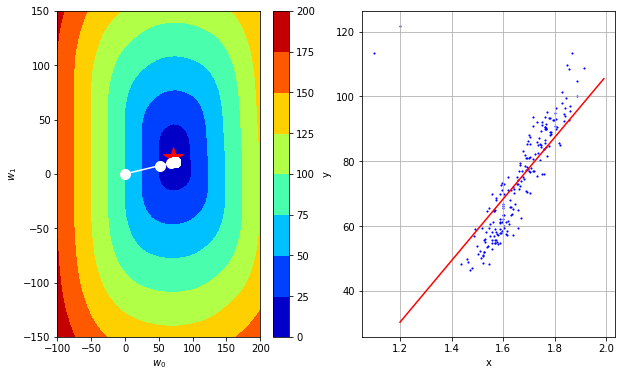

In [215]:
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
plot_figure(len(gradient_ws))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [209]:
def compute_loss_mae(y, tx, w):
    e = y - tx.dot(w)
    e = np.absolute(e)
    return e.sum() / len(y)

compute_loss = compute_loss_mae




compute_loss(y, tx, (1, 2))

73.067805854926377

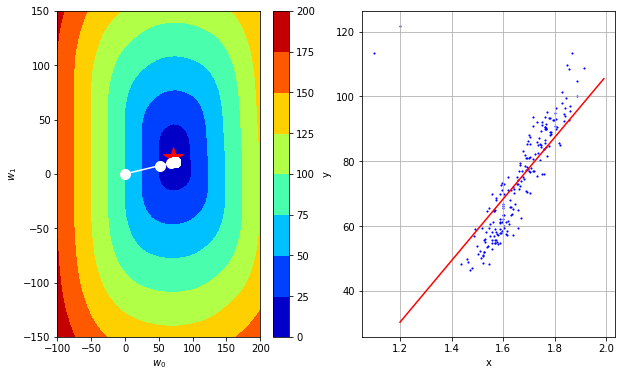

In [210]:
plot_figure(len(gradient_ws))